In [1]:
import sys
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.metrics import r2_score

import seaborn as sns

# import custom modules
sys.path.append('../../utils')
import data_paths
import traffic_counts
import excel_calendar

In [2]:
# define filename of the visum file
cnt_path = data_paths.COUNTING_PATH

old = pd.read_parquet(cnt_path  + 'counting_data_combined_old.parquet')
new = pd.read_parquet(cnt_path  + 'counting_data_combined_until2024_v2.parquet')

In [8]:
df_old = old[old['vehicle_class']=='SUM']

df_old[df_old['date'].between('2019-01-01', '2019-12-31') & (df_old['valid'])].groupby('road_type')['road_link_id'].nunique().sum()

np.int64(57)

In [9]:
df_new = new[new['vehicle_class']=='SUM']

df_new[df_new['date'].between('2019-01-01', '2019-12-31') & (df_new['valid'])].groupby('road_type')['road_link_id'].nunique()


road_type
Access-residential             1
Distributor/Secondary         31
Motorway-Nat                  39
TrunkRoad/Primary-City         9
TrunkRoad/Primary-National     2
Name: road_link_id, dtype: int64

In [112]:
df_old = old[old['vehicle_class']=='SUM']

df_old[df_old['date'].between('2019-01-01', '2019-12-31') & df_old['valid']].groupby('road_type')['road_link_id'].nunique()

road_type
Access-residential         1
Distributor/Secondary     29
Motorway-Nat              19
TrunkRoad/Primary-City     8
Name: road_link_id, dtype: int64

In [113]:
df_new = new[new['vehicle_class']=='SUM']

ivalid_rd_links = list(df_new[df_new['date'].between('2019-01-01', '2019-12-31') & (df_new['valid']==False)]['road_link_id'].unique())

In [114]:
ivalid_rd_links = df_old[df_old['date'].between('2019-01-01', '2019-12-31') & (df_old['valid']==True)]['road_link_id'].unique()

<Axes: >

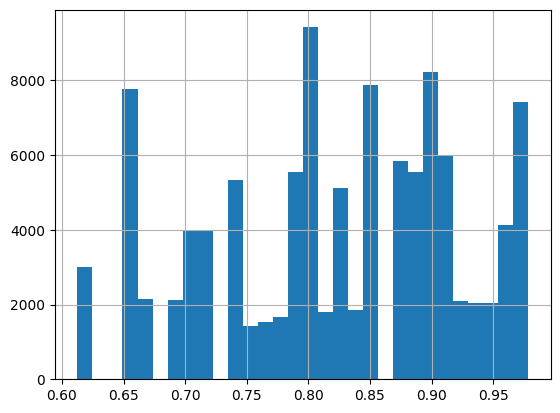

In [115]:
df_new.set_index(['road_link_id']).loc[ivalid_rd_links]['sqv'].hist(bins=30)